In [1]:
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
hfontLarge = {'fontname':'Latin Modern Roman', 'size' : 24, 'weight' : 'bold'}

import numpy as np

from pykern.pkcollections import PKDict

import rslaser.rsoptics.wavefront as rswf
import rslaser.rsoptics.element as rse
import rslaser.rspulse.pulse as rsp
import rslaser.rscrystal.crystal as rsc
# import rslaser.rscavity.laser_cavity as rslc

import scipy.constants as const
import srwlib
from srwlib import srwl

In [2]:
# specify the parameters in a PKDict dictionary object
_PHE_DEFAULT = const.h * const.c / 1e-6   # photon energy corresponding to lambda = 1 micron
_Z_WAIST_DEFAULT = 0
_Z_CENTER_DEFAULT = 0
_LASER_PULSE_SLICE_DEFAULTS = PKDict(
    sigrW=0.000186,
    propLen=15,
    sig_s=0.1,
    pulseE=0.001,
    poltype=1,
    sampFact=5,
    mx=0,
    my=0
)
_LASER_PULSE_DEFAULTS = PKDict(
        phE=_PHE_DEFAULT,
        nslice=3,
        chirp=0,
        w0=.1,
        a0=.01,
        dw0x=0.0,
        dw0y=0.0,
        z_waist=_Z_WAIST_DEFAULT,
        dzwx=0.0,
        dzwy=0.0,
        tau_fwhm=0.1 / const.c / math.sqrt(2.),
        z_center=_Z_CENTER_DEFAULT,
        x_shift = 0.,
        y_shift=0.,
        d_to_w=_Z_WAIST_DEFAULT - _Z_CENTER_DEFAULT,
        slice_params=_LASER_PULSE_SLICE_DEFAULTS,
)

In [3]:
#create crystal
c = rse.Crystal(n0=1.75,n2=0.001,L_cryst=0.2)

In [4]:
#create laser pulse
sigrW=0.00043698412731784714
# lp = LaserPulse(length=0.1,wavelength=800e-9,nslice=11)
data_in = _LASER_PULSE_DEFAULTS.copy()
data_in.length=0.1
wavelength=800e-9
data_in.phE = const.h * const.c / wavelength
data_in.nslice=11
lp = rsp.LaserPulse(data_in)

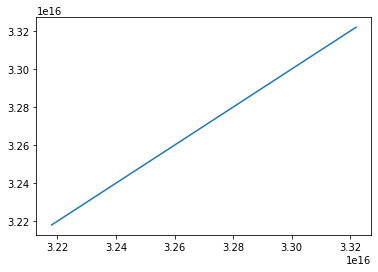

In [5]:
(lpsxvals,lpsyvals) = lp.rmsvals()
plt.plot(lpsxvals,lpsyvals)

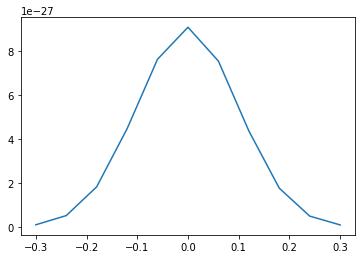

In [6]:
ivals = lp.intensity_vals()
svals = lp.pulsePos()
plt.plot(svals,ivals)

In [7]:
#propagate laser pulse through crystal
c.propagate(lp)

#propagate laser pulse through drift
d = rse.Drift(length=0.5)
d.propagate(lp)


#propagate laser pulse through lens
lens = rse.Lens(f=0.2)
lens.propagate(lp)

#propagate laser pulse through drift
d.propagate(lp)

#propagate laser pulse through crystal
c.propagate(lp)

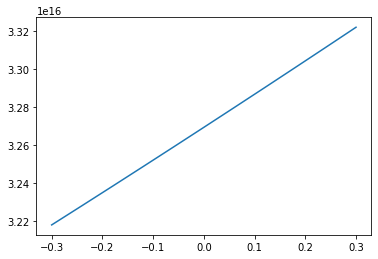

In [8]:
#Plot final laser pulse size distribution
svals = lp.pulsePos()
(lpsxvals,lpsyvals) = lp.rmsvals()
plt.plot(svals,lpsyvals)

In [9]:
wfr0=lp.slice[3].wfr
wfr0.unitElFld

1

Size of initial wavefront data array (coordinate): (12, 12)


Text(0.5, 1.0, 'Intensity at Waist')

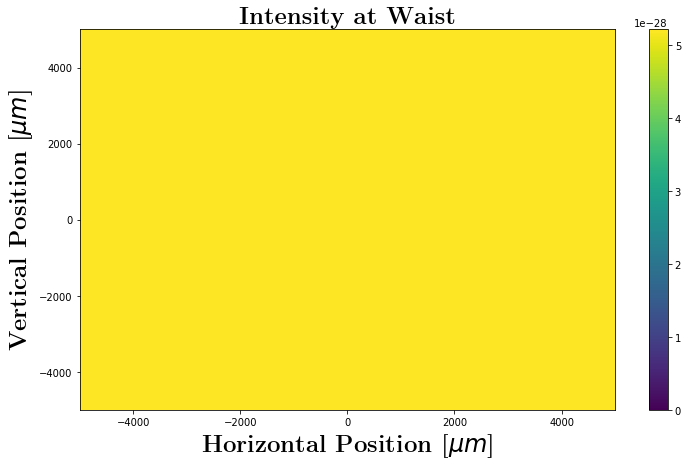

In [10]:
# Plot initial wavefront
wfrplot = lp.slice[1].wfr

arIinit = srwlib.array('f', [0]*wfrplot.mesh.nx*wfrplot.mesh.ny) #"flat" array to take 2D intensity data
srwl.CalcIntFromElecField(arIinit, wfrplot, 6, 0, 3, wfrplot.mesh.eStart, 0, 0) #extracts intensity
##Reshaping electric field data from flat to 2D array
arIinit2D = np.array(arIinit).reshape((wfrplot.mesh.nx, wfrplot.mesh.ny), order='C')
wfrsizei=np.size(arIinit)

print('Size of initial wavefront data array (coordinate):',np.shape(arIinit2D))
xvalsf02=np.linspace(wfrplot.mesh.xStart,wfrplot.mesh.xFin,wfrplot.mesh.nx)
yvalsf02=np.linspace(wfrplot.mesh.yStart,wfrplot.mesh.yFin,wfrplot.mesh.ny)

fig = plt.figure(figsize=(12,7))
ax = fig.gca()

# By setting wfr0a.unitElFldAng=1, default units should  now be in mrad(?)
plt.pcolormesh(np.multiply(xvalsf02,1e6), np.multiply(yvalsf02,1e6), arIinit2D, cmap=plt.cm.viridis, shading='auto')
plt.colorbar()

xmax = 5e3
ymax = 5e3
ax.set_ylim(-ymax,ymax)
ax.set_xlim(-xmax,xmax)
ax.set_ylabel(r'Vertical Position [$\mu m$]',**hfontLarge)
ax.set_xlabel(r'Horizontal Position [$\mu m$]',**hfontLarge)
ax.set_title('Intensity at Waist',**hfontLarge)

In [11]:
f1=.5
optLens = srwlib.SRWLOptL(f1, f1)

In [12]:
optLens.Fx

0.5

In [13]:
optLens.Fx=.4